In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import KFold,cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [104]:
chrun = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
chrun.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Problem Statement:**

    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

## EDA

In [105]:
chrun.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [106]:
chrun.shape

(7043, 21)

Shape of our dataset 7043,21

In [107]:
chrun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Information of dataset.**
- RangeIndex: 0 to 7042
- Total columns: 21
- dtypes: float64(1), int64(2), object(18)

In [108]:
chrun.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Short description of our dataset.**
- Counts
- Mean
- Standard deviation
- Minimum
- 1st quantile
- 2nd quantile
- 3rd quantile
- Maximum value of each columns.

**- Data Cleaning.**

In [109]:
chrun['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

There are blank space present in TotalCharges column.

In [110]:
chrun['TotalCharges'] = chrun['TotalCharges'].replace(' ', np.nan)

Removing the blank spaces.

In [111]:
chrun.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are Null Values present in Total Charges

**- Dropping the Null Values.**

In [112]:
chrun.dropna(inplace = True)

**- Duplicated values.**

In [113]:
chrun.duplicated().sum()

0

**- Removing the 0 from tenure column & Dropping the unwanted column**

In [114]:
chrun.drop(labels=chrun[chrun['tenure'] == 0].index, axis=0, inplace=True)

In [115]:
chrun.drop('customerID',axis =1,inplace = True)

**- Converting the TotalCharges column to float.**

In [116]:
chrun['TotalCharges'] = chrun['TotalCharges'] .astype(float)

## Visualization:

In [45]:
def count(x):
    sns.countplot(y = x)

In [23]:
def scatter(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=chrun)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

**- Univariate Analysis.**

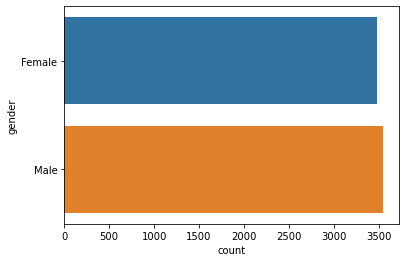

In [46]:
count(chrun['gender'])

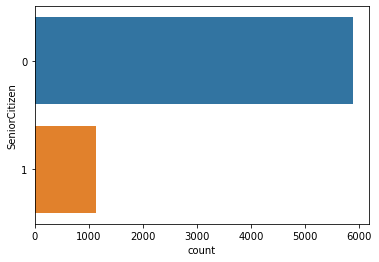

In [47]:
count(chrun['SeniorCitizen'])

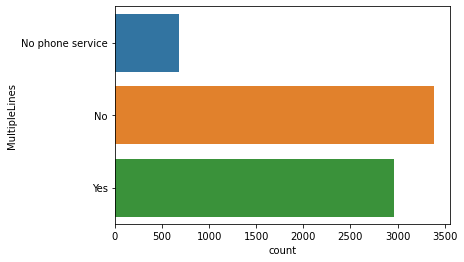

In [48]:
count(chrun['MultipleLines'])

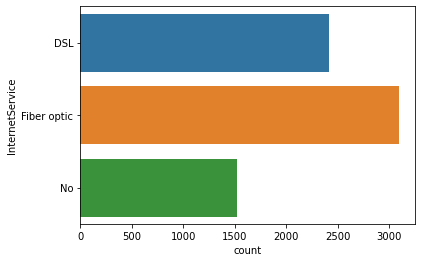

In [49]:
count(chrun['InternetService'])

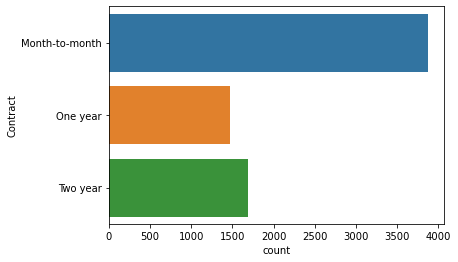

In [50]:
count(chrun['Contract'])

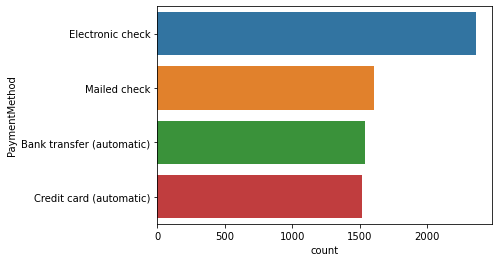

In [51]:
count(chrun['PaymentMethod'])

**- Bivariate Analysis.**

Scatterpot between tenure and TotalCharges


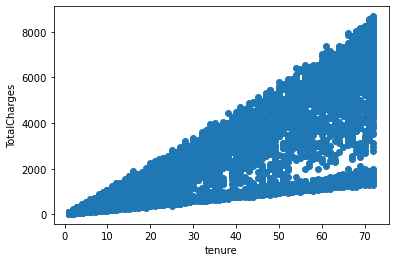

In [29]:
scatter(x = 'tenure',y = 'TotalCharges',data = chrun)

Scatterpot between tenure and MonthlyCharges


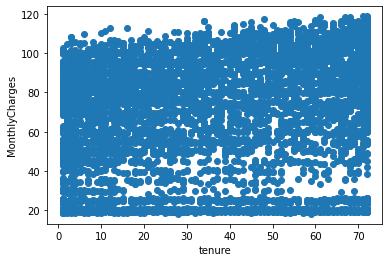

In [30]:
scatter(x = 'tenure',y = 'MonthlyCharges',data = chrun)

Scatterpot between TotalCharges and MonthlyCharges


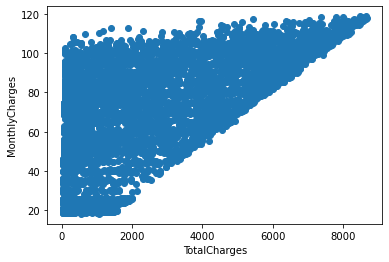

In [31]:
scatter(x = 'TotalCharges',y = 'MonthlyCharges',data = chrun)

Scatterpot between Churn and TotalCharges


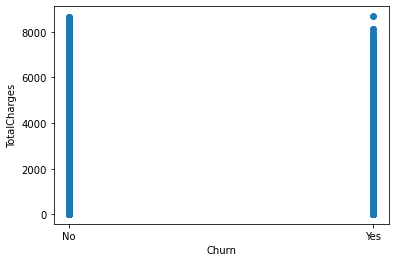

In [34]:
scatter(x = 'Churn',y = 'TotalCharges',data = chrun)

## Encoding:

In [117]:
lb = LabelEncoder()
def encode(x):
    chrun[x] = lb.fit_transform(chrun[x])

In [118]:
column=[column for column in chrun.columns if chrun[column].dtype=='object']
column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

These are Object Columns.

In [119]:
for i in column:
    encode(i)

In [120]:
chrun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


## Normal Distribution:

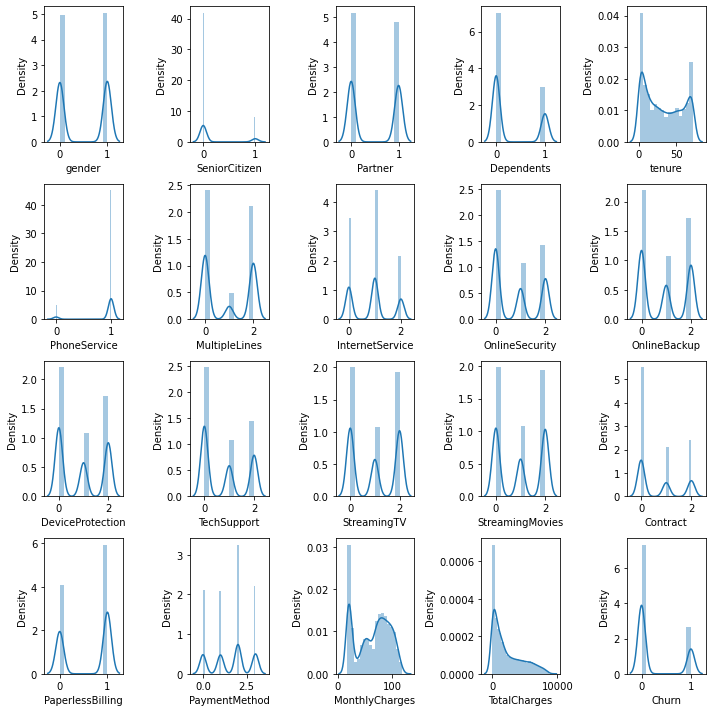

In [57]:
plt.figure(figsize = (10,10))
plotnumber = 1

for column in chrun:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(chrun[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

Dataset is Normally Distributed.

## Outliers:

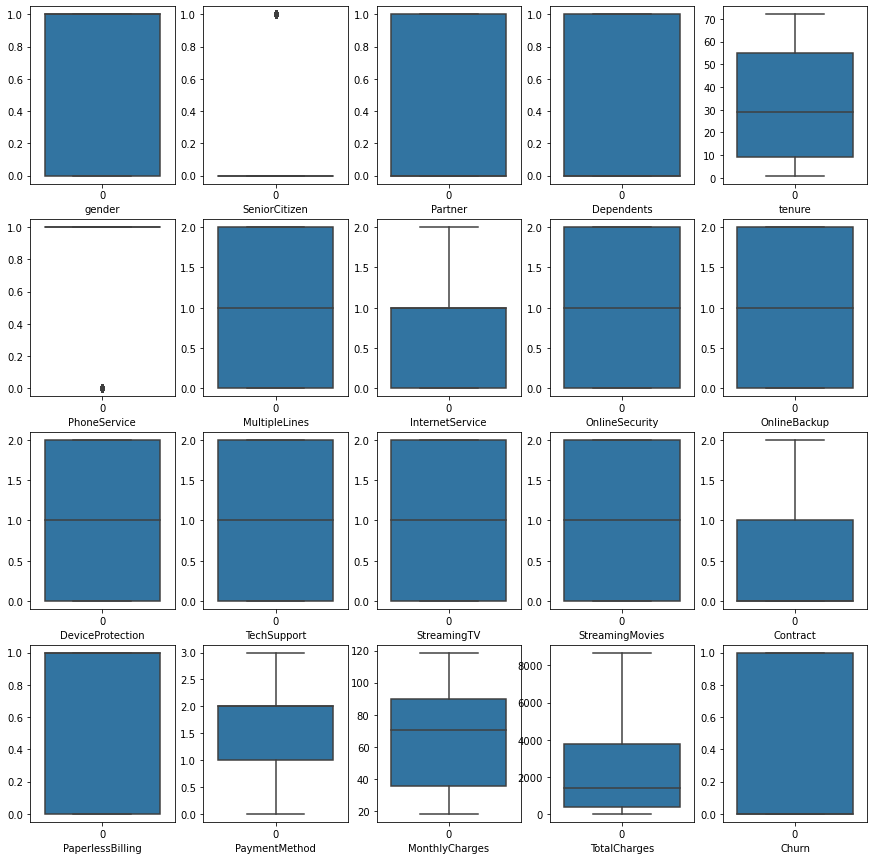

In [58]:
plt.figure(figsize = (15,15))
graph = 1
for column in chrun:
    if graph <= 20:
        plt.subplot(4,5,graph)
        ax = sns.boxplot(data = chrun[column])
        plt.xlabel(column, fontsize = 10)
    graph += 1
plt.show()

                                No outliers present in our dataset.

## Correlation:

In [60]:
df = chrun.corr()

<AxesSubplot:>

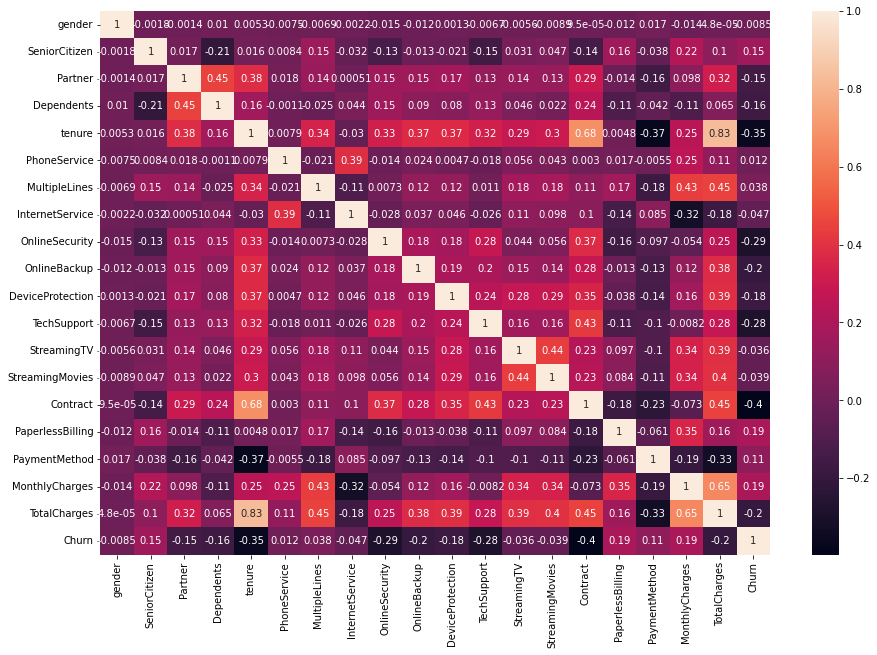

In [61]:
plt.figure(figsize = (15,10))
sns.heatmap(df,annot = True)

                                    No Multicolinearity Present.

In [122]:
chrun

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


Final Dataset.

## Model Building.

**- Seperating Features & Target Column.**

In [123]:
x = chrun.drop('Churn',axis =1)
y = chrun.Churn

**- Scaling the Features.**

In [125]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train Test Split.**

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 90, test_size = 0.25)

**- Function for Training & Testing.**

In [135]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))
        print('\n ----- Roc Curve ----- \n')
        plot_roc_curve(clas, x_test, y_test) 

**- Model Instantiating.**

In [128]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()

**- KNeighbors Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.8325748957148275

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      3863
           1       0.71      0.64      0.67      1411

    accuracy                           0.83      5274
   macro avg       0.79      0.77      0.78      5274
weighted avg       0.83      0.83      0.83      5274


 ----- Confusion matrix ----- 
 [[3494  369]
 [ 514  897]]

 ----- Test Result ----- 

Accuracy Score: 0.7514220705346986

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1300
           1       0.52      0.48      0.50       458

    accuracy                           0.75      1758
   macro avg       0.67      0.66      0.67      1758
weighted avg       0.75      0.75      0.75      1758


 ----- Confusion matrix ----- 
 [[1100  200]
 [ 237  221]]

 ----- Roc Curve -----

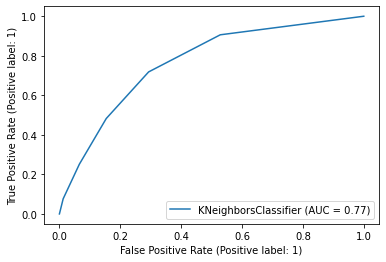

In [136]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.9984831247629883

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      1411

    accuracy                           1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274


 ----- Confusion matrix ----- 
 [[3860    3]
 [   5 1406]]

 ----- Test Result ----- 

Accuracy Score: 0.7918088737201365

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1300
           1       0.64      0.45      0.53       458

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758


 ----- Confusion matrix ----- 
 [[1184  116]
 [ 250  208]]

 ----- Roc Curve -----

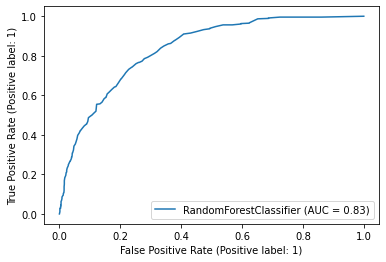

In [137]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.8058399696624953

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3863
           1       0.67      0.54      0.60      1411

    accuracy                           0.81      5274
   macro avg       0.76      0.72      0.73      5274
weighted avg       0.80      0.81      0.80      5274


 ----- Confusion matrix ----- 
 [[3491  372]
 [ 652  759]]

 ----- Test Result ----- 

Accuracy Score: 0.7986348122866894

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1300
           1       0.63      0.54      0.58       458

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758


 ----- Confusion matrix ----- 
 [[1155  145]
 [ 209  249]]

 ----- Roc Curve -----

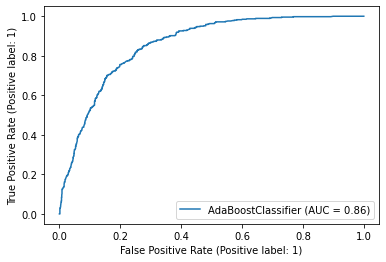

In [139]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- GradientBoosting Classifier.**


 ----- Train Result ----- 

Accuracy Score: 0.826317785362154

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      3863
           1       0.73      0.56      0.63      1411

    accuracy                           0.83      5274
   macro avg       0.79      0.74      0.76      5274
weighted avg       0.82      0.83      0.82      5274


 ----- Confusion matrix ----- 
 [[3573  290]
 [ 626  785]]

 ----- Test Result ----- 

Accuracy Score: 0.800910125142207

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1300
           1       0.65      0.50      0.57       458

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758


 ----- Confusion matrix ----- 
 [[1178  122]
 [ 228  230]]

 ----- Roc Curve ----- 


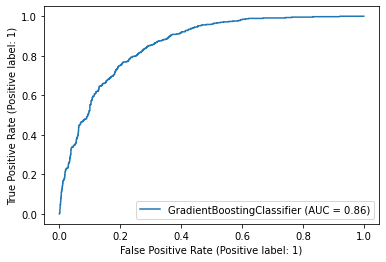

In [138]:
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)

**- ORIGINAL VS PREDICTED.**

In [140]:
a_gb = np.array(y_test)
predicted_gb = np.array(gb.predict(x_test))
df_gb = pd.DataFrame({'Original':a_gb,'Predicted':predicted_gb})
df_gb

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
1753,0,0
1754,1,1
1755,1,0
1756,0,0


       GradientBoosting Classifier, IS GIVING THE BEST ACCURACY SCORE.

## Cross-Validation:

In [143]:
k = KFold(n_splits = 3,shuffle = True)
for train,test in k.split(chrun):
    print('Train:',train,'\ntest:',test)

Train: [   1    5    6 ... 7028 7029 7031] 
test: [   0    2    3 ... 7026 7027 7030]
Train: [   0    1    2 ... 7028 7029 7030] 
test: [  12   13   16 ... 7018 7020 7031]
Train: [   0    2    3 ... 7027 7030 7031] 
test: [   1    5    6 ... 7025 7028 7029]


In [145]:
cross_val_score(gb,x_scaled,y,cv = 3).mean()

0.8030432309442549

    Cross-Validation Score & Test Accuracy of GradientBoostingClassifier is almost equal so over model is good.

## Hyperparameter Tuning:

In [81]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [96]:
param = {'n_estimators':range(1,100,10),
         'learning_rate':[0.0,0.5,1.0],
         'criterion':['friedman_mse', 'squared_error', 'mse']}

In [97]:
par = {'max_features':['auto', 'sqrt', 'log2'],
         'validation_fraction':[0.0,0.2,0.5,0.8,1.0],
         'random_state':range(1,100,10)}

In [98]:
grid = GridSearchCV(gb, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'n_estimators': 11}


In [99]:
grid = GridSearchCV(gb, param_grid = par)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'max_features': 'sqrt', 'random_state': 11, 'validation_fraction': 0.2}


In [133]:
gb_hyp = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.5, n_estimators = 11,
                                   max_features = 'sqrt', random_state = 11, validation_fraction = 0.2)

In [134]:
gb_hyp.fit(x_train,y_train)
score(gb_hyp, x_train,x_test,y_train,y_test,train = True)
score(gb_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8109594235874099

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3863
           1       0.70      0.51      0.59      1411

    accuracy                           0.81      5274
   macro avg       0.77      0.72      0.73      5274
weighted avg       0.80      0.81      0.80      5274


 ----- Confusion matrix ----- 
 [[3551  312]
 [ 685  726]]

 ----- Test Result ----- 

Accuracy Score: 0.8031854379977247

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1300
           1       0.66      0.50      0.57       458

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758


 ----- Confusion matrix ----- 
 [[1182  118]
 [ 228  230]]


    Post tuning & Pre tuning, Score are equal.

**Saving the Model.**

In [150]:
filename = 'customer.pickle'
pickle.dump(gb, open(filename, 'wb'))